In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data , columns = boston.feature_names)
bos.shape
bos['Price'] = boston.target
bos.head()
bos.dtypes
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


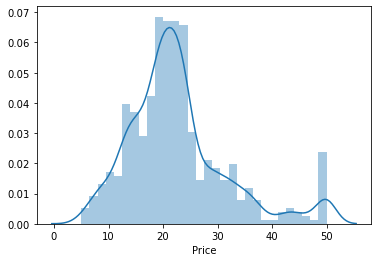

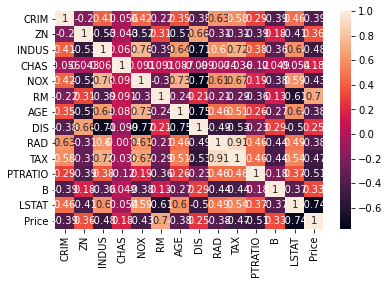

In [11]:
sns.distplot(bos['Price'], bins=30)
plt.show()
sns.heatmap(data=bos.corr(), annot=True)

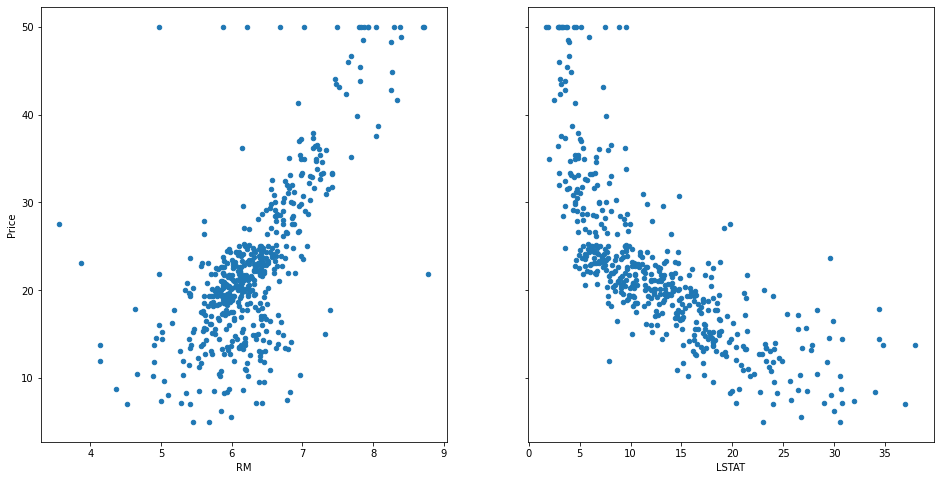

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True)
bos.plot(kind = 'scatter' , x = 'RM' , y = 'Price' , ax = axs[0] , figsize = (16,8))
bos.plot(kind = 'scatter' , x = 'LSTAT' , y = 'Price' , ax = axs[1] , figsize = (16,8))


In [16]:
X = bos[['RM' , 'LSTAT']]
y = bos.Price


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)
print(lm.n_features_in_)


-1.358272811874489
[ 5.09478798 -0.64235833]
2


In [17]:
rm = 6.680 
lstat = 5.00
price = -1.358272811874489 + 5.09478798 *rm + -0.64235833*lstat
price


29.46311924452551

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Price ~ RM + LSTAT' , data=bos).fit()
lm.conf_int()


,0,1
Intercept,-7.591900,4.875355
RM,4.221550,5.968026
LSTAT,-0.728277,-0.556440


In [21]:
lm.pvalues

Intercept    6.687649e-01
RM           3.472258e-27
LSTAT        6.669365e-41
dtype: float64

In [22]:
lm.rsquared

0.6385616062603403

In [23]:
lm.rsquared_adj

0.637124475470123

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          7.01e-112
Time:                        10:54:55   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler =StandardScaler()

In [144]:
X_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [145]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [146]:
import pickle
filename = 'boston_lin_model.pickle'
pickle.dump(reg,open(filename , 'wb'))


In [151]:
loaded_model = pickle.load(open(filename , 'rb'))
p = loaded_model.predict(x_test)
p

array([14.89518122, 21.73348933, 29.62256479, 23.43872145,  4.48533865,
       23.76371619, 25.03126339, 20.25698222, 40.00302361, 20.10684643,
       23.54042256, 23.19337692, 21.98303828, 17.22672991, 13.60502852,
       29.33366342, 23.67188531, 19.94483729, 21.53224552, 17.71781617,
       23.58599539, 26.90514585, 30.83831338, 26.02264235, 31.03319866,
       22.63898909, 29.70303726, 31.62829862, 28.29171711, 19.98094353,
       25.1581331 , 27.03809679, 21.40942495, 22.07675669, 22.59515495,
       27.55555826, 33.67365896, 18.4289574 , 27.20513261, 26.50603073,
       22.40244308, 13.6972759 , 18.49860141, 21.58443917, 23.60926789,
       19.53273317, 26.77828149, 19.85082335, 26.94963519, 20.24129414,
       23.19419383, 18.14560623, 18.72745704, 30.60135624, 36.91773938,
        4.33777884, 35.50101143, 27.02443328, 18.23338368, 24.09589602,
        7.18259959, 22.27693202, 12.71319333, 22.10624103, 27.72949006,
        8.20225201, 26.18994368, 30.35222807, 19.77035945, 20.62

In [152]:
reg.score(x_train,y_train)

0.6289775425893549

In [154]:
reg.score(x_test,y_test)

0.6593780966464116